# Reddit Research: Taoism

## Topic Analysis

In [327]:
!pip install pandas numpy nltk scikit-learn gensim spacy matplotlib wordcloud tqdm
!python -m nltk.downloader stopwords punkt
!python -m spacy download en_core_web_sm

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.6 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.6 MB/s eta 0:00:05
     -------- ------------------------------- 2.6/12.8 MB 2.6 MB/s eta 0:00:04
     --------- ------------------------------ 3.1/12.8 MB 2.6 MB/s eta 0:00:04
     ----------- ---------------------------- 3.7/12.8 MB 2.6 MB/s eta 0:00:04
     ------------- -------------------------- 4.2/12.8 MB 2.6 MB/s eta 0:00:04
     -------------- ------------------------- 4.7/12.8 MB 2.6 MB/s eta 0:00:04
     ----------------- ---------------------- 5.5/12.8 MB 2.6 MB/s eta 0:00:03
     ------------------ --------------------- 6.0/12.8 MB 2.6 MB/s eta 0:00:03
     -------------------- ------------------- 6.6/12.8 MB 2

In [328]:
import matplotlib.pyplot as plt
import pandas as pd

In [329]:
# Load the labeled Reddit Taoism data
comments_df = pd.read_csv("../data/taoism_comments_labeled.csv")

# Preview the structure
comments_df.head()

,post_id,comment_id,parent_id,author,body,score,created_utc,depth,clean_text,topic,topic_label
0,1kn2via,msf3jdu,t3_1kn2via,whatthebosh,Everything is as it is. If you feel moved to h...,32,1.747300e+09,0,feel move help man tear sound horrible simply ...,-1,NaN
1,1kn2via,msez1as,t3_1kn2via,ZipMonk,It's not about good and evil those are Abraham...,26,1.747297e+09,0,good evil abrahamic concept,10,Theistic Interpretations of Taoism
2,1kn2via,msezcku,t3_1kn2via,Yous1ash,Buddhism is much more equipped to deal with su...,25,1.747297e+09,0,buddhism equipped deal suffering experience st...,-1,NaN
3,1kn2via,msf2ald,t3_1kn2via,jacques-vache-23,Why do you walk by? The moment was there and ...,20,1.747299e+09,0,walk moment let pass move,25,Navigating Life's Path
4,1kn2via,msfl533,t3_1kn2via,yellowlotusx,"Today, i went to the spots where hobos and add...",7,1.747309e+09,0,today go spot hobo addict hang give strawberry...,4,Balancing Desire and Contentment


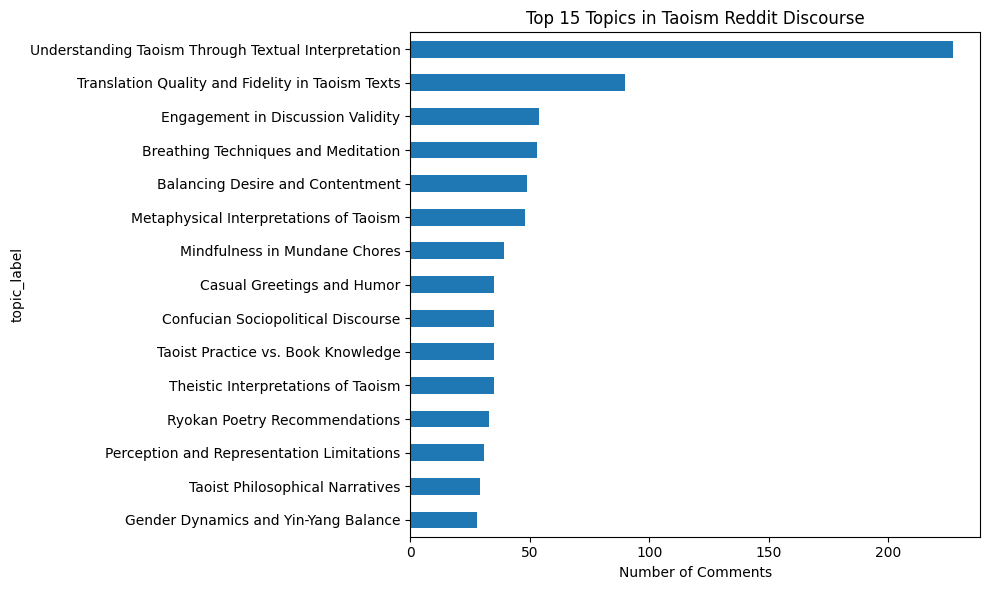

In [330]:
topic_counts = comments_df['topic_label'].value_counts().head(15)
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Topics in Taoism Reddit Discourse")
plt.xlabel("Number of Comments")
plt.tight_layout()
plt.show()

In [331]:
import random

def show_sample_comments(topic_label, n=3):
    """Display n random comments from a specific topic label."""
    if topic_label not in comments_df['topic_label'].unique():
        print(f"Topic '{topic_label}' not found.")
        return
    
    sample = comments_df[comments_df['topic_label'] == topic_label].sample(n, random_state=42)
    for i, comment in enumerate(sample['body'], 1):
        print(f"\n--- Comment {i} ---\n{comment.strip()}\n")

In [332]:
show_sample_comments("Taoist Practice vs. Book Knowledge")


--- Comment 1 ---
How can you speak if you have not studied the full history of all language?

I gather you cannot, based on the gibberish coming from your mouth.

The number of assumptions you have made is staggering; might I suggest that you check yourself, before you wreck yourself?


--- Comment 2 ---
Again, an ill-informed comment.

Accomplishment through doing is not cognizant bias is demonstration of principle through practice. 

Rather than imposing your own cognizant bias onto others address it the cognizant bias within your own mind.


--- Comment 3 ---
The other comments are bang on. I'd add that it's important to not put writing ahead of learning or developing wisdom and insight. The old saying 'write what you know' certainly fits into this. If you don't have anything to say, it makes writing a lot harder. The inverse is also true.



Grouping Labels Into Themes

In [334]:
sorted(comments_df['topic_label'].dropna().unique())

['Apologies and Proving Points',
 'Appreciative Online Interactions',
 'Balancing Desire and Contentment',
 'Balancing Workout and Recovery',
 'Bazi and Feng Shui Analysis',
 'Breathing Techniques and Meditation',
 'Casual Conversational Expressions',
 'Casual Greetings and Humor',
 'Comparing Taoism and Legalism',
 'Confucian Sociopolitical Discourse',
 'Dao as Water: Flow and Humility',
 'Daoist Philosophy and Ritual Engagement',
 'Effortlessness in Action',
 'Engagement in Discussion Validity',
 'Exploring Aged Cheeses and Daoism',
 'Gender Dynamics and Yin-Yang Balance',
 'Gratitude and Positive Celebrations',
 'Interfaith Criticism and Confusion',
 'Metaphysical Interpretations of Taoism',
 'Mindfulness in Mundane Chores',
 "Navigating Life's Path",
 'Navigating Relationships and Happiness',
 'Navigating Suffering and Learning',
 'Perception and Representation Limitations',
 'Philosophical Inquiry into Daoism',
 'Ryokan Poetry Recommendations',
 'Sleep and Sunlight Patterns',
 'Su

Now we will make the model find common themes withing these labels, and group them.

In [336]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv

In [337]:
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [338]:
topic_labels = sorted(comments_df['topic_label'].dropna().unique().tolist())

In [339]:
prompt = f"""
You are a research assistant for a digital religion project studying Taoist discourse on Reddit. Your task is to group the following topic labels into one of four specific thematic categories defined by the research team.

Each topic label must be used exactly once. If any label appears ambiguous, assign it to the category that best matches its **overall function or tone** in the discourse. Please include all labels — do not leave any out.

The 4 allowed thematic categories are:

1. **Practical Taoism** – Topics about daily life, routines, personal choices, or how people apply Taoist principles in practice. (e.g. mindfulness, balance in life, parenting, work)

2. **Philosophical Exploration** – Interpretations, questions, and reflections on Taoist scripture or ideas. This includes metaphorical or poetic discussions where deeper philosophical meaning is involved.

3. **Community Relationships** – Discussions on interpersonal dynamics, gender, justice, social structures, or how Taoism shapes people’s view of others or society.

4. **Meta / Off-topic / Other** – Anything that does not fit into the above, including emojis-only content, `[deleted]` comments, moderation discussions, joke threads, or ambiguous topics like “cheese” or astrology.

Please return:
1. A list of topic labels under each of the 4 themes.
2. For each theme, a brief justification of why these topic labels fit the category.
3. A final note if any labels were difficult to classify, and how you resolved it.

Here is the full list of topic labels (use each one exactly once):

{topic_labels}
"""


response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=[{"role": "user", "content": prompt}],
    temperature=0.3
)

print(response.choices[0].message.content)

### Categorization of Topic Labels:

#### 1. Practical Taoism
- **Balancing Desire and Contentment**
- **Balancing Workout and Recovery**
- **Breathing Techniques and Meditation**
- **Mindfulness in Mundane Chores**
- **Navigating Life's Path**
- **Sleep and Sunlight Patterns**
- **Taoist Parenting Perspectives**
- **Taoist Practice and Non-Attachment**
- **Technology and Mindful Reflection**

**Justification:** These topics directly relate to daily practices, personal health, and the application of Taoist principles in everyday life, such as maintaining balance, mindfulness, and parenting.

#### 2. Philosophical Exploration
- **Comparing Taoism and Legalism**
- **Dao as Water: Flow and Humility**
- **Daoist Philosophy and Ritual Engagement**
- **Effortlessness in Action**
- **Metaphysical Interpretations of Taoism**
- **Philosophical Inquiry into Daoism**
- **Ryokan Poetry Recommendations**
- **Surfing as Taoist Metaphor**
- **Taoism and Environmental Ethics**
- **Taoist Philosophical

In [340]:
theme_map = {
    # Practical Taoism
    "Balancing Desire and Contentment": "Practical Taoism",
    "Balancing Workout and Recovery": "Practical Taoism",
    "Breathing Techniques and Meditation": "Practical Taoism",
    "Mindfulness in Mundane Chores": "Practical Taoism",
    "Navigating Life's Path": "Practical Taoism",
    "Sleep and Sunlight Patterns": "Practical Taoism",
    "Taoist Parenting Perspectives": "Practical Taoism",
    "Taoist Practice and Non-Attachment": "Practical Taoism",
    "Technology and Mindful Reflection": "Practical Taoism",

    # Philosophical Exploration
    "Comparing Taoism and Legalism": "Philosophical Exploration",
    "Confucian Sociopolitical Discourse": "Philosophical Exploration",
    "Dao as Water: Flow and Humility": "Philosophical Exploration",
    "Daoist Philosophy and Ritual Engagement": "Philosophical Exploration",
    "Effortlessness in Action": "Philosophical Exploration",
    "Metaphysical Interpretations of Taoism": "Philosophical Exploration",
    "Philosophical Inquiry into Daoism": "Philosophical Exploration",
    "Ryokan Poetry Recommendations": "Philosophical Exploration",
    "Surfing as Taoist Metaphor": "Philosophical Exploration",
    "Taoism and Environmental Ethics": "Philosophical Exploration",
    "Taoist Philosophical Narratives": "Philosophical Exploration",
    "Taoist Philosophy on Naturalness and Virtue": "Philosophical Exploration",
    "Theistic Interpretations of Taoism": "Philosophical Exploration",
    "Translation Quality and Fidelity in Taoism Texts": "Philosophical Exploration",
    "Understanding Taoism Through Textual Interpretation": "Philosophical Exploration",

    # Community Relationships
    "Apologies and Proving Points": "Community Relationships",
    "Appreciative Online Interactions": "Community Relationships",
    "Casual Conversational Expressions": "Community Relationships",
    "Casual Greetings and Humor": "Community Relationships",
    "Gender Dynamics and Yin-Yang Balance": "Community Relationships",
    "Gratitude and Positive Celebrations": "Community Relationships",
    "Navigating Relationships and Happiness": "Community Relationships",
    "Navigating Suffering and Learning": "Community Relationships",

    # Meta / Off-topic / Other
    "[Data Redaction and Apologies]": "Meta / Off-topic / Other",
    "Bazi and Feng Shui Analysis": "Meta / Off-topic / Other",
    "Engagement in Discussion Validity": "Meta / Off-topic / Other",
    "Exploring Aged Cheeses and Daoism": "Meta / Off-topic / Other",
    "Interfaith Criticism and Confusion": "Meta / Off-topic / Other",
    "Perception and Representation Limitations": "Meta / Off-topic / Other",
    "Taoist Practice vs. Book Knowledge": "Meta / Off-topic / Other"
}


In [341]:
comments_df['theme'] = comments_df['topic_label'].map(theme_map)

In [342]:
unmapped = comments_df[comments_df['theme'].isna()]['topic_label'].unique()
print("Unmapped topics:", unmapped)

Unmapped topics: [nan]


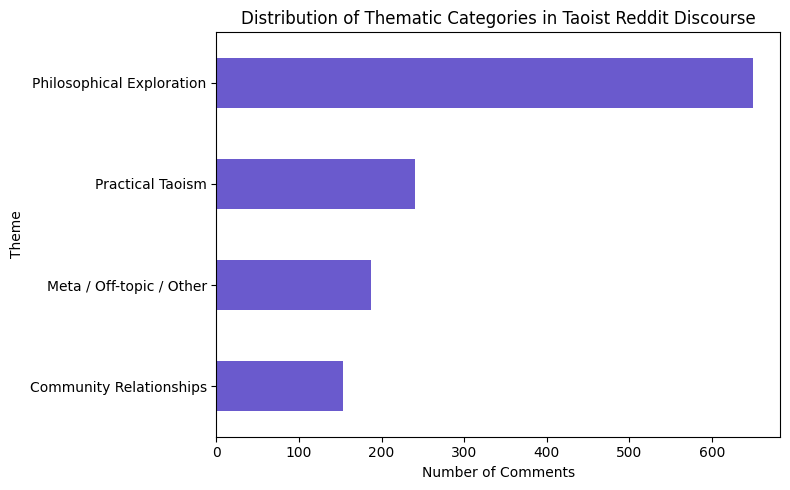

In [343]:
theme_counts = comments_df["theme"].value_counts()

plt.figure(figsize=(8, 5))
theme_counts.plot(kind="barh", color="slateblue")
plt.gca().invert_yaxis()
plt.title("Distribution of Thematic Categories in Taoist Reddit Discourse")
plt.xlabel("Number of Comments")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()

In [344]:
# Count of comments per theme
summary_df = comments_df.groupby("theme")["topic_label"].value_counts().rename("comment_count").reset_index()

# Optional: save to CSV
summary_df.to_csv("../data/theme_summary.csv", index=False)

In [345]:
def show_sample_comments_by_theme(theme, n=3):
    """Display n random comments for a given theme."""
    if theme not in comments_df["theme"].unique():
        print(f"Theme '{theme}' not found.")
        return
    
    sample = comments_df[comments_df["theme"] == theme].sample(n, random_state=1)
    for i, row in sample.iterrows():
        print(f"\n--- {row['topic_label']} | Comment {i} ---\n{row['body'].strip()}\n")

In [346]:
show_sample_comments_by_theme("Philosophical Exploration")


--- Taoist Philosophy on Naturalness and Virtue | Comment 1272 ---
Thanks! Does that have something to do with the Yijing?


--- Understanding Taoism Through Textual Interpretation | Comment 901 ---
Good question. I have come to see that what Lao Tzu and Chuang Tzu were writing about was self awareness. Obviously, that brings us into the realm of psychology, but that doesn’t mean that they are equivalent. 

What you’ve written goes well beyond anything in the  Tao Te Ching. I’m not interested in going through your post line by line looking for inconsistencies. You’re welcome to your own understanding of human nature, but I think it’s misleading to paint it with the brush of Taoism.


--- Taoist Philosophical Narratives | Comment 1848 ---
Lol, Zhuangzi would seriously kick Laozi's ass if you brought them together 🤣. Imagine Zhuangzi's reaction to chapters 67 and 80 (Chapter 80 is particularly disturbing) of the DDJ. He'd tear Laozi to shreds, lol 🤣.

How about Guo Xiang vs. Wang Bi? 😁


In [347]:
show_sample_comments_by_theme("Practical Taoism")


--- Technology and Mindful Reflection | Comment 335 ---
Simply think less, and be more.


--- Sleep and Sunlight Patterns | Comment 2001 ---
I have never had a psych med without strong side effects that reached into alternate aspects of my life, how much I have medicated to treat for insomnia, which came as a result of using other medications, for example, is a good one. 

 Perhaps paracetomal will be up my alley!


--- Mindfulness in Mundane Chores | Comment 1446 ---
Yes I think you're right. I'd rather go for a hard workout or grapple with some new idea. Both of those are more vigorous than laundry, but it comes down to what the ego resists or doesn't.



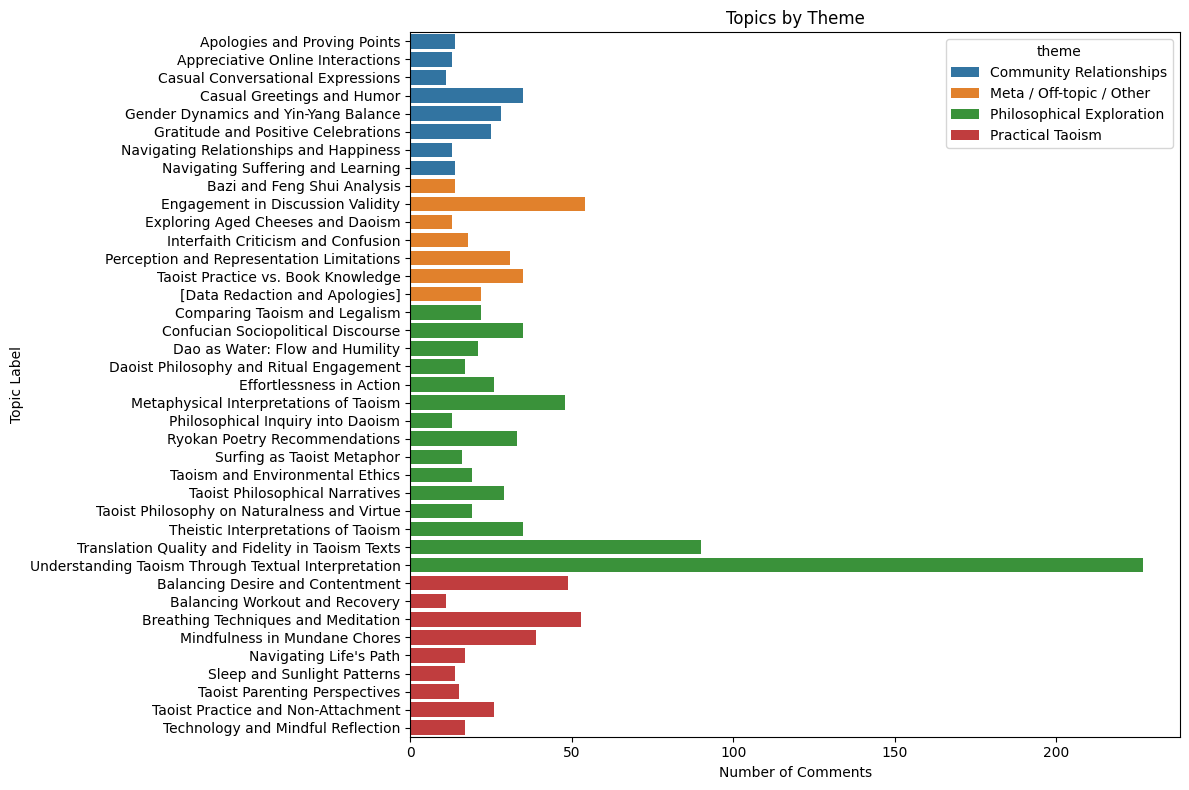

In [348]:
import seaborn as sns

# Count of comments per topic within each theme
theme_topic_counts = comments_df.groupby(["theme", "topic_label"]).size().reset_index(name="count")

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=theme_topic_counts, y="topic_label", x="count", hue="theme", dodge=False)
plt.title("Topics by Theme")
plt.xlabel("Number of Comments")
plt.ylabel("Topic Label")
plt.tight_layout()
plt.show()

In [349]:
def show_sample_comments_by_topic(topic_label, n=3):
    """Display n random comments for a specific topic label."""
    if topic_label not in comments_df["topic_label"].unique():
        print(f"Topic '{topic_label}' not found.")
        return

    sample = comments_df[comments_df["topic_label"] == topic_label].sample(n, random_state=42)
    for i, comment in enumerate(sample["body"], 1):
        print(f"\n--- {topic_label} | Comment {i} ---\n{comment.strip()}\n")

In [350]:
show_sample_comments_by_topic("Dao as Water: Flow and Humility")


--- Dao as Water: Flow and Humility | Comment 1 ---
Evian is the reverse of naive. Don't forget to hydrate, everybody.


--- Dao as Water: Flow and Humility | Comment 2 ---
Hey no worries. I'm a huge fan of Watts too. And you are right, "real Wu Wei" is like water, which loves and nourishes all things, without lording it over anyone. Water has no intention to be "wu wei" because it just is. Water is so benevolent that we can take a dump in it too, and it doesn't mind. Nothing is left undone.


--- Dao as Water: Flow and Humility | Comment 3 ---
Hmm well I think the Dao is before duality like good and evil. Chapter 5 is the Dao is impartial. Maybe that is one way to put it. Overall I'd say it's good, it is like water, it benefits everyone without lording it over.



### Sentiment Analysis

In [352]:
!pip install nltk
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [353]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Apply VADER to get compound sentiment score (-1 to 1)
comments_df["sentiment"] = comments_df["body"].apply(lambda x: vader.polarity_scores(str(x))["compound"])

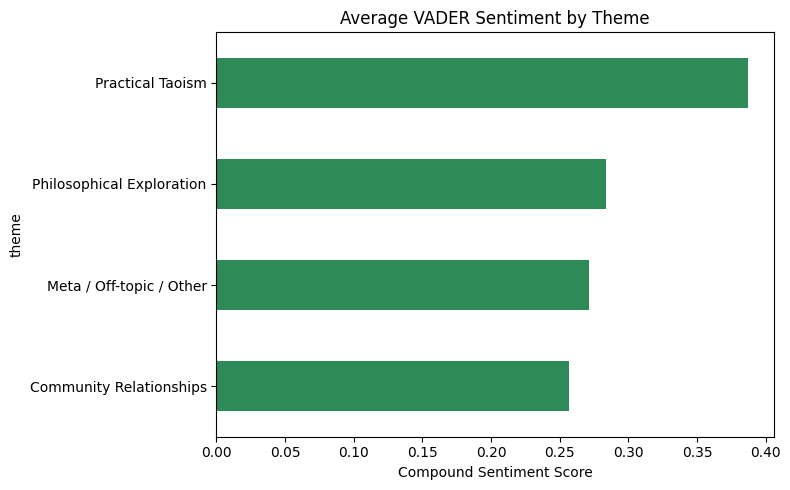

In [354]:
theme_sentiment = comments_df.groupby("theme")["sentiment"].mean().sort_values()

plt.figure(figsize=(8, 5))
theme_sentiment.plot(kind="barh", color="seagreen")
plt.title("Average VADER Sentiment by Theme")
plt.xlabel("Compound Sentiment Score")
plt.tight_layout()
plt.show()

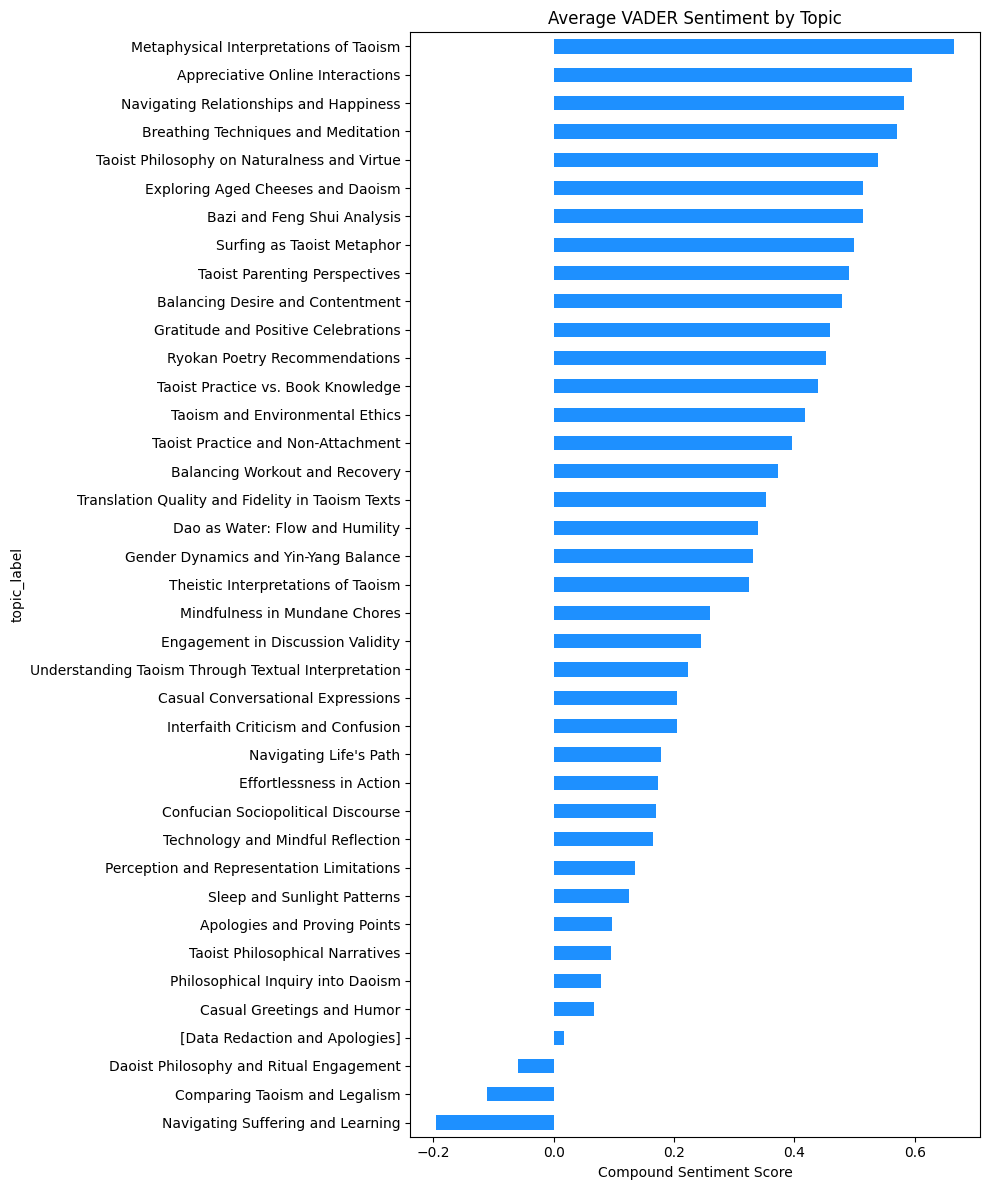

In [355]:
topic_sentiment = comments_df.groupby("topic_label")["sentiment"].mean().sort_values()

plt.figure(figsize=(10, 12))
topic_sentiment.plot(kind="barh", color="dodgerblue")
plt.title("Average VADER Sentiment by Topic")
plt.xlabel("Compound Sentiment Score")
plt.tight_layout()
plt.show()


In [356]:
# Top 5 most positive comments
print("Most Positive Comments:\n")
print(comments_df.sort_values("sentiment", ascending=False)[["theme", "topic_label", "body"]].head(5))

# Top 5 most negative comments
print("\nMost Negative Comments:\n")
print(comments_df.sort_values("sentiment", ascending=True)[["theme", "topic_label", "body"]].head(5))


Most Positive Comments:

                          theme                             topic_label  \
1001  Philosophical Exploration  Metaphysical Interpretations of Taoism   
1693  Philosophical Exploration  Metaphysical Interpretations of Taoism   
749            Practical Taoism     Breathing Techniques and Meditation   
1642  Philosophical Exploration  Metaphysical Interpretations of Taoism   
1941                        NaN                                     NaN   

                                                   body  
1001  Okay, I don’t want to get too into it because ...  
1693  I have had training in Akashic record reading,...  
749   Interestingly, English translations of Lao Tzu...  
1642  **TLDR:** watch the Benebell Wen Youtube video...  
1941  > 1.What skills transcend materialism? What tr...  

Most Negative Comments:

                          theme                                  topic_label  \
190   Philosophical Exploration       Metaphysical Interpretations of 

In [357]:
!pip install transformers torch nrclex --quiet
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [358]:
from transformers import pipeline

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

Device set to use cpu


In [359]:
def get_roberta_sentiment(text):
    try:
        result = sentiment_pipeline(str(text))[0]
        return result["label"], result["score"]
    except:
        return None, None

# Apply to a subset for testing
comments_df_subset = comments_df.copy().head(500)
comments_df_subset[["roberta_label", "roberta_score"]] = comments_df_subset["body"].apply(
    lambda x: pd.Series(get_roberta_sentiment(x))
)

In [360]:
comments_df_subset["roberta_label"].value_counts(dropna=False)

label_map = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

comments_df_subset["roberta_label"] = comments_df_subset["roberta_label"].map(label_map)

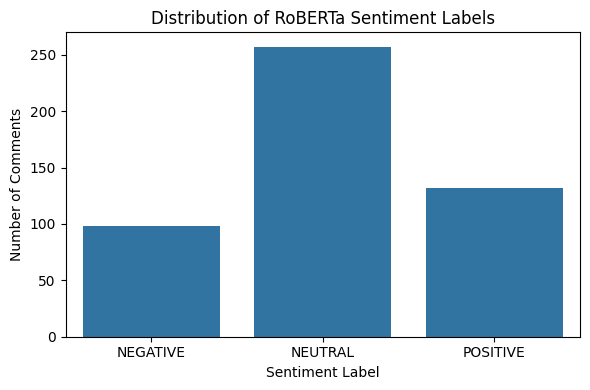

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=comments_df_subset, x="roberta_label", order=["NEGATIVE", "NEUTRAL", "POSITIVE"])
plt.title("Distribution of RoBERTa Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

In [362]:
comments_df_subset[["theme", "topic_label", "roberta_label", "roberta_score", "body"]].to_csv("../data/roberta_sentiment_comments.csv", index=False)

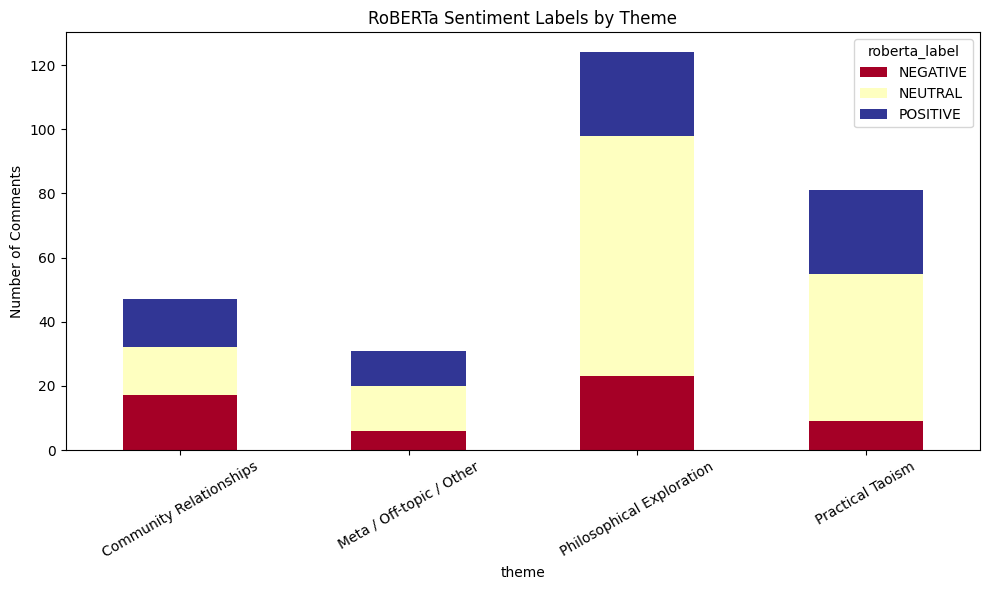

In [363]:
# Count sentiment labels per theme
sentiment_theme = comments_df_subset.groupby(["theme", "roberta_label"]).size().unstack().fillna(0)

# Normalize to percent if desired:
# sentiment_theme = sentiment_theme.div(sentiment_theme.sum(axis=1), axis=0)

sentiment_theme.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="RdYlBu")
plt.title("RoBERTa Sentiment Labels by Theme")
plt.ylabel("Number of Comments")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [364]:
from transformers import pipeline

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

Device set to use cpu


In [365]:
from tqdm import tqdm

# Prepare empty columns
comments_df["roberta_label"] = None
comments_df["roberta_score"] = None

# Apply sentiment model in batches
for i in tqdm(range(len(comments_df))):
    try:
        result = sentiment_pipeline(str(comments_df.loc[i, "body"]))[0]
        comments_df.loc[i, "roberta_label"] = result["label"]
        comments_df.loc[i, "roberta_score"] = result["score"]
    except Exception as e:
        comments_df.loc[i, "roberta_label"] = None
        comments_df.loc[i, "roberta_score"] = None

100%|██████████| 2010/2010 [03:59<00:00,  8.38it/s]


In [366]:
label_map = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

comments_df["roberta_label"] = comments_df["roberta_label"].map(label_map)

In [367]:
comments_df.to_csv("../data/taoism_comments_labeled_with_roberta.csv", index=False)

<Axes: xlabel='roberta_label', ylabel='count'>

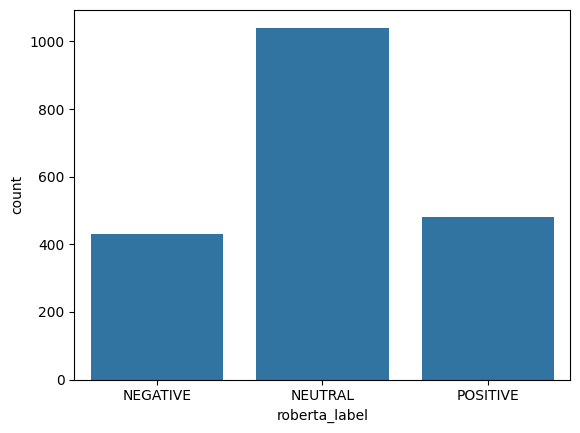

In [368]:
sns.countplot(data=comments_df, x="roberta_label", order=["NEGATIVE", "NEUTRAL", "POSITIVE"])

<Axes: xlabel='theme', ylabel='roberta_score'>

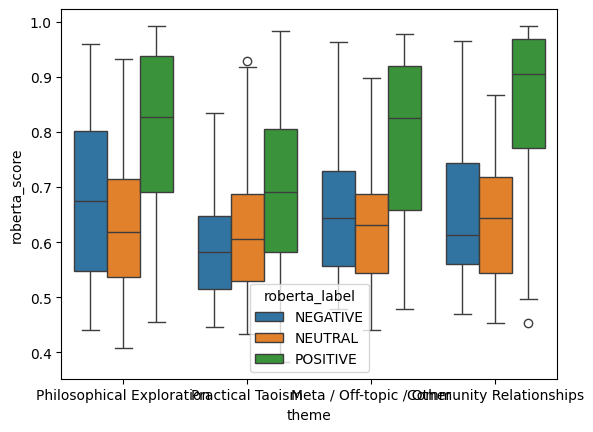

In [369]:
sns.boxplot(data=comments_df, x="theme", y="roberta_score", hue="roberta_label")


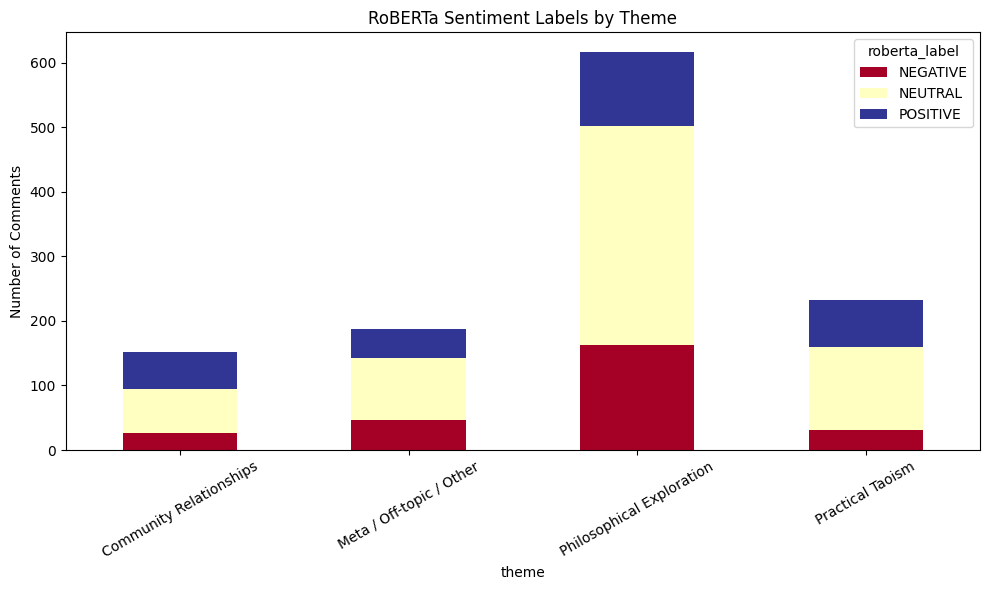

In [370]:
# Count sentiment labels per theme
sentiment_theme = comments_df.groupby(["theme", "roberta_label"]).size().unstack().fillna(0)

# Normalize to percent if desired:
# sentiment_theme = sentiment_theme.div(sentiment_theme.sum(axis=1), axis=0)

sentiment_theme.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="RdYlBu")
plt.title("RoBERTa Sentiment Labels by Theme")
plt.ylabel("Number of Comments")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [371]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "nrclex"])

0

In [372]:
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bacep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [373]:
def get_nrc_emotions(text):
    emotion_obj = NRCLex(str(text))
    top_emotions = emotion_obj.top_emotions
    return top_emotions[0][0] if top_emotions else None

comments_df_subset["emotion"] = comments_df_subset["body"].apply(get_nrc_emotions)

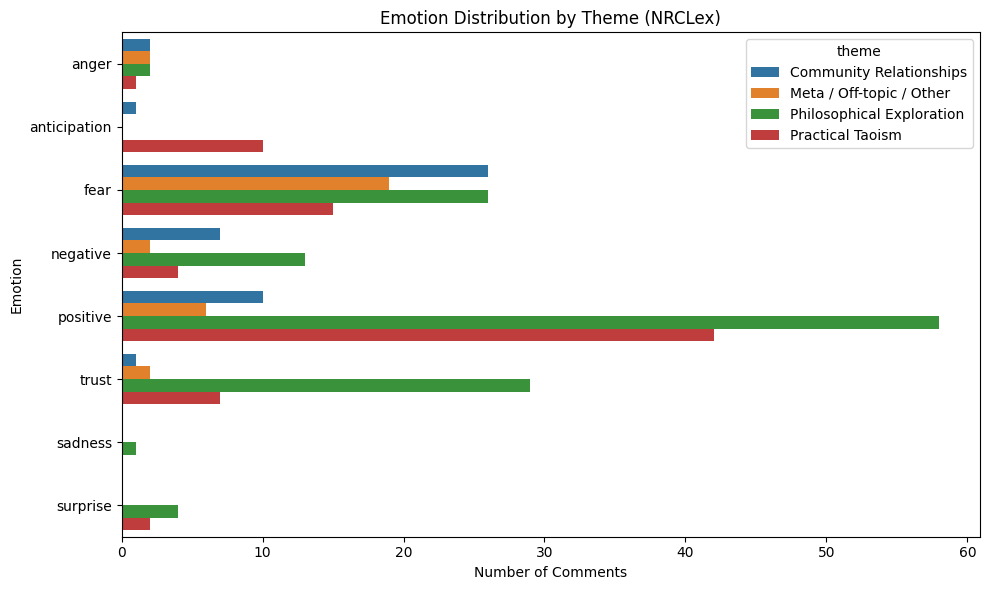

In [374]:
import seaborn as sns

emotion_theme_counts = comments_df_subset.groupby(["theme", "emotion"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=emotion_theme_counts, x="count", y="emotion", hue="theme")
plt.title("Emotion Distribution by Theme (NRCLex)")
plt.xlabel("Number of Comments")
plt.ylabel("Emotion")
plt.tight_layout()
plt.show()


In [375]:
def show_comments_by_emotion(emotion, n=3):
    sample = comments_df_subset[comments_df_subset["emotion"] == emotion].sample(n, random_state=42)
    for i, row in sample.iterrows():
        print(f"\n--- {row['theme']} | {row['topic_label']} ---\n{row['body'].strip()}\n")

# Example usage:
show_comments_by_emotion("surprise")


--- Practical Taoism | Sleep and Sunlight Patterns ---
I guess like half my waking hours are on a screen?  
Last time I had a full day would be when I went camping, which I do a couple times a year I guess.


--- Practical Taoism | Technology and Mindful Reflection ---
Was this pic taken in Minneapolis by chance?


--- nan | nan ---
Once upon a time, there was a poor farmer who had a single horse.
One day, the horse ran away.

His neighbors said, “What bad luck!”

The farmer replied, “Maybe so, maybe not. Who knows?”

A few days later, the horse returned — bringing with it three wild horses.

The neighbors exclaimed, “What good luck!”

The farmer calmly said, “Maybe so, maybe not. Who knows?”

Then, the farmer’s son tried to ride one of the wild horses, fell, and broke his leg.

The neighbors cried, “What terrible luck!”

Again, the farmer said, “Maybe so, maybe not. Who knows?”

Soon after, the army came to the village to conscript young men for war.
They saw the son’s broken leg and

In [376]:
show_comments_by_emotion("anger")


--- nan | nan ---
not a direct answer, but i just heard the other day of a fast help with migraines. Soak your feet in the hottest water you're able to tolerate. Apparently this dilates the veins in the feet, taking more blood there and away from the head.

alternatively, you could take up a long term practice of qi/nei gong, and at some point it may treat whatever underlying issues is causing the migraines. E.g. like this one [https://www.reddit.com/r/TrueQiGong/comments/1gna86r/qinei\_gong\_from\_a\_more\_mentalemotional\_healing/](https://www.reddit.com/r/TrueQiGong/comments/1gna86r/qinei_gong_from_a_more_mentalemotional_healing/) . Or maybe see a TCM practitioner that's trained in daoist energetics.


--- nan | nan ---
SCREECH! REEEEE! It’s the tantrums of the sanctimonious again. 

Y’all know the facade of wizened equanimity goes fluttering out the window when you gatekeep like weebs brandishing plastic katanas, right? There are fundie Christian literalists that think the Earth i

In [377]:
top_pos = comments_df[comments_df["roberta_label"] == "POSITIVE"].sort_values("roberta_score", ascending=False).head(5)
top_neg = comments_df[comments_df["roberta_label"] == "NEGATIVE"].sort_values("roberta_score", ascending=False).head(5)

print("Top Positive Comments:\n")
for i, row in top_pos.iterrows():
    print(f"{row['roberta_score']:.2f} | {row['theme']} | {row['topic_label']}\n{row['body']}\n")

print("\nTop Negative Comments:\n")
for i, row in top_neg.iterrows():
    print(f"{row['roberta_score']:.2f} | {row['theme']} | {row['topic_label']}\n{row['body']}\n")


Top Positive Comments:

0.99 | Community Relationships | Appreciative Online Interactions
Thank you again for your comments they are the best thing on the Internet for me ❤️

0.99 | Philosophical Exploration | Ryokan Poetry Recommendations
That's wonderful.  I will look up the other chapters.  This chapter is very nice, thank you for sharing it.

0.99 | nan | nan
This is beautiful, thank you!

0.99 | Philosophical Exploration | Taoist Philosophy on Naturalness and Virtue
same, I was so impressed by Shen Qiao! Thank you I will PM :)

0.99 | Community Relationships | Gratitude and Positive Celebrations
Thank you so much for this!


Top Negative Comments:

0.97 | nan | nan
It's not good. It just is.

0.96 | Community Relationships | Navigating Suffering and Learning
Yea, it hurts me especially when i see homeless people in wheelchairs. How do they go to the restroom? How do they get anywhere really? What if their arms are weak too? Ive struggled w dental issues and have access to amazing 

In [378]:
from nrclex import NRCLex
from tqdm import tqdm

# Apply NRCLex to full DataFrame
def get_nrc_emotion(text):
    try:
        return NRCLex(str(text)).top_emotions[0][0]
    except:
        return None

# Add progress bar
comments_df["emotion"] = [get_nrc_emotion(text) for text in tqdm(comments_df["body"])]

100%|██████████| 2010/2010 [00:01<00:00, 1094.49it/s]


In [379]:
comments_df.to_csv("../data/taoism_comments_with_roberta_sentiment.csv", index=False)

## Cross-Analysis

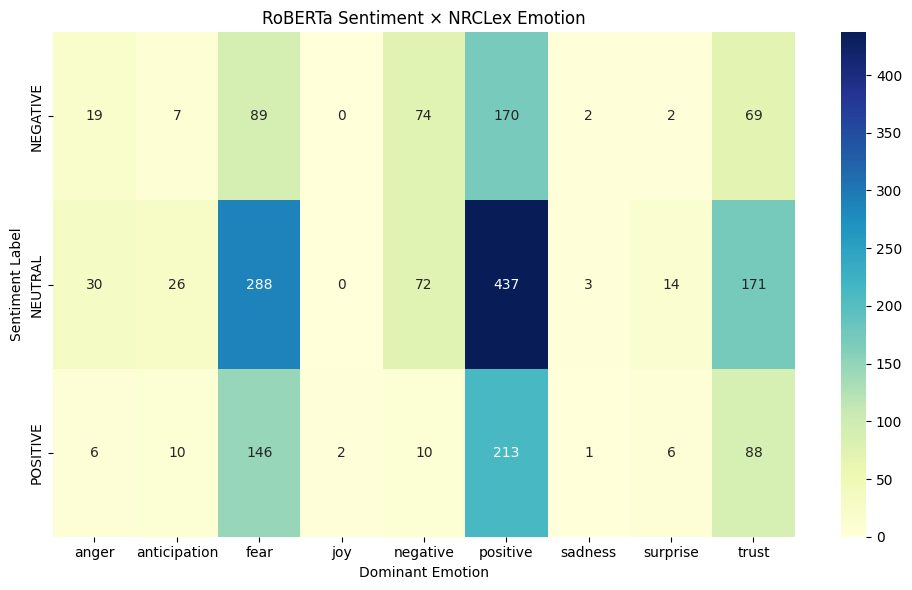

In [439]:
cross_tab = pd.crosstab(comments_df["roberta_label"], comments_df["emotion"])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("RoBERTa Sentiment × NRCLex Emotion")
plt.ylabel("Sentiment Label")
plt.xlabel("Dominant Emotion")
plt.tight_layout()
plt.savefig("../data/sentiment_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


"NEUTRAL" + "positive" (437) is dominant — many posts have emotionally positive language but a semantically neutral stance (e.g., factual expressions of Taoist ideas).

"NEGATIVE" + "positive" (170) is surprisingly high — a sign of philosophical struggle or dissonant tone (e.g., accepting suffering).

"POSITIVE" + "fear" (146) — interesting tension here; perhaps comments reflecting peaceful surrender or “letting go” of fear with acceptance.

## Sentiment Variance by Topic

In [443]:
sentiment_variance = comments_df.groupby("topic_label")["roberta_score"].agg(["mean", "std"]).sort_values("std", ascending=False)

# Rename for clarity
sentiment_variance.columns = ["mean_sentiment_score", "std_dev"]
sentiment_variance.reset_index(inplace=True)

In [451]:
for i, row in sentiment_variance.head(15).iterrows():
    print(f"{row['topic_label']:<45} | Mean: {row['mean_sentiment_score']:.2f} | Std Dev: {row['std_dev']:.2f}")


Exploring Aged Cheeses and Daoism             | Mean: 0.81 | Std Dev: 0.17
Navigating Relationships and Happiness        | Mean: 0.68 | Std Dev: 0.17
Translation Quality and Fidelity in Taoism Texts | Mean: 0.73 | Std Dev: 0.17
Taoist Philosophical Narratives               | Mean: 0.69 | Std Dev: 0.16
Dao as Water: Flow and Humility               | Mean: 0.69 | Std Dev: 0.16
Balancing Workout and Recovery                | Mean: 0.71 | Std Dev: 0.16
Interfaith Criticism and Confusion            | Mean: 0.67 | Std Dev: 0.16
Navigating Suffering and Learning             | Mean: 0.66 | Std Dev: 0.16
Engagement in Discussion Validity             | Mean: 0.70 | Std Dev: 0.15
Technology and Mindful Reflection             | Mean: 0.68 | Std Dev: 0.15
Theistic Interpretations of Taoism            | Mean: 0.67 | Std Dev: 0.15
Gender Dynamics and Yin-Yang Balance          | Mean: 0.69 | Std Dev: 0.15
Taoist Philosophy on Naturalness and Virtue   | Mean: 0.67 | Std Dev: 0.14
Gratitude and Positive

In [455]:
def show_comments_for_topic(topic_label, n=5):
    sample = comments_df[comments_df["topic_label"] == topic_label].sample(n, random_state=42)
    for i, row in sample.iterrows():
        print(f"\n--- {row['roberta_label']} | {row['roberta_score']:.2f} ---")
        print(row["body"].strip())


In [457]:
show_comments_for_topic("Navigating Suffering and Learning")


--- NEGATIVE | 0.56 ---
What don't you get  ? , he's in pain because he has a chemical imbalance in his brain . There's medication for that, but that also comes with side effects. 

The man is unfortunate that he has the genetics that allow that to happen , it just is what it is 

Now you could help, but do you have the skills ? Like most of us probably not but there are people that do like charities that help the homeless you google and find one in your area and inquire , you can only act within your capacity of skills both empathetically and intellectually. The Dali Lama said we should strive to do good, and if you can't do that, at least do no harm.

--- NEUTRAL | 0.54 ---
It grants us the power of suffering over things that have not and may never happen

--- NEGATIVE | 0.52 ---
His suffering and your compassion, yin and yang? The stillness and the chaos? Sane/insane/insane all suffer. You are suffering with your feelings of helplessness, this may be the issue to address. You can m

## Annotation Function

In [495]:
from openai import OpenAI
import os
from dotenv import load_dotenv
load_dotenv()

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [497]:
def build_rhetoric_prompt(comment):
    return f"""
You are analyzing online discourse about Taoism.

Given the following Reddit comment, your task is to classify the **rhetorical function** of the comment — that is, what kind of discursive move the user is making.

Choose one rhetorical category that best fits the comment:
- Personal reflection
- Moral reasoning
- Philosophical speculation
- Humor or irony
- Doctrinal interpretation
- Confession or testimony
- Social or political critique
- Clarifying or defining a concept
- Expressing doubt or uncertainty
- Other (if none fit)

Only return the name of the rhetorical category. Do not explain or comment.

Comment:
\"\"\"{comment}\"\"\"
"""

def get_rhetoric_label(comment):
    prompt = build_rhetoric_prompt(comment)
    try:
        response = client.chat.completions.create(
            model="gpt-4-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.3
        )
        return response.choices[0].message.content.strip()
    except Exception:
        return "Error"

def generate_annotated_quotes_llm(topic_label, n=5):
    sample = comments_df[comments_df["topic_label"] == topic_label].sample(n, random_state=42)
    
    annotated = []

    for _, row in sample.iterrows():
        comment = row["body"].strip()
        sentiment = f"{row['roberta_label']} ({row['roberta_score']:.2f})"
        emotion = row.get("emotion", "N/A")
        rhetoric_gpt4 = get_rhetoric_label(comment)

        annotated.append({
            "topic_label": row["topic_label"],
            "theme": row["theme"],
            "sentiment": sentiment,
            "emotion": emotion,
            "rhetoric_gpt4": rhetoric_gpt4,
            "body": comment
        })

    return pd.DataFrame(annotated)


In [499]:
annotated_df = generate_annotated_quotes_llm("Navigating Suffering and Learning", n=8)

In [501]:
with pd.option_context("display.max_colwidth", 500):
    display(annotated_df)


,topic_label,theme,sentiment,emotion,rhetoric_gpt4,body
0,Navigating Suffering and Learning,Community Relationships,NEGATIVE (0.56),negative,Clarifying or defining a concept,"What don't you get ? , he's in pain because he has a chemical imbalance in his brain . There's medication for that, but that also comes with side effects. \n\nThe man is unfortunate that he has the genetics that allow that to happen , it just is what it is \n\nNow you could help, but do you have the skills ? Like most of us probably not but there are people that do like charities that help the homeless you google and find one in your area and inquire , you can only act within your capacity ..."
1,Navigating Suffering and Learning,Community Relationships,NEUTRAL (0.54),fear,Philosophical speculation,It grants us the power of suffering over things that have not and may never happen
2,Navigating Suffering and Learning,Community Relationships,NEGATIVE (0.52),fear,Philosophical speculation,"His suffering and your compassion, yin and yang? The stillness and the chaos? Sane/insane/insane all suffer. You are suffering with your feelings of helplessness, this may be the issue to address. You can make a difference but you also need to be safe and approaching someone in the depths of an episode is not for the average Joe. \nI was once insane for many years, others saw suffering, sometimes I was so free it was beautiful. \nWhat does this interaction/observation inspire you to do? \nNo..."
3,Navigating Suffering and Learning,Community Relationships,NEGATIVE (0.73),positive,Social or political critique,"You suggest a myriad of options that are available to this person and it comes down to a personal choice. The reality of the options for this individual are often more limited than what you present. As a whole, there aren't many places in the world in which someone can just walk in to a therapist office or rehab clinic for free. If you are struggling with mental health issues, such as schizophrenia or bipolar I without medication, your logical decision-making processes are realistically remo..."
4,Navigating Suffering and Learning,Community Relationships,NEUTRAL (0.55),negative,Doctrinal interpretation,"Your experience in seeing this man suffer and not helping him has caused so much suffering in you that you have come to Reddit for advice. Taoism would have you follow the path of least resistance, consonant with the flow of the universe toward the good. If you want to create less turbulence, you will ease the suffering of others to ease your own suffering and reduce the net pain in the universe."
5,Navigating Suffering and Learning,Community Relationships,NEGATIVE (0.96),positive,Personal reflection,"Yea, it hurts me especially when i see homeless people in wheelchairs. How do they go to the restroom? How do they get anywhere really? What if their arms are weak too? Ive struggled w dental issues and have access to amazing doctors and still found it hard to eat at times, how are they able to eat or even get water? They can’t easily access a water fountain in a library, it’s far. \n\nIdk man, really hurts my heart but yea, what can we really do :("
6,Navigating Suffering and Learning,Community Relationships,NEGATIVE (0.90),negative,Expressing doubt or uncertainty,Why did you let him suffer?
7,Navigating Suffering and Learning,Community Relationships,NEUTRAL (0.49),positive,Personal reflection,"I think my biggest struggle when learning about the Tao (and I still have much to learn so my understanding may be wrong) however, from the understanding I have. The only thing that didn’t sit well with me was the concept of not interfering with what exists or is happening. \n\nThe example I recall was about a tree in a stream. The tree branches don’t move for the water, but the water still finds a way to flow. \n\nWhich is lovely in theory. \n\nIn reality I find that much harder. I think th..."
